In [1]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from NV import *

def T1Fit(t,I_inf,C_m,T_m,C_1,T_1):
         return I_inf * (1 - C_m*np.exp(-t/T_m) + C_1*np.exp(-t/T_1))

Phi: 62.456203 +/- 0.648692
Theta: 52.367533 or +/- 0.607519
Phi(naive): 55.618000
Theta(naive): 56.073559


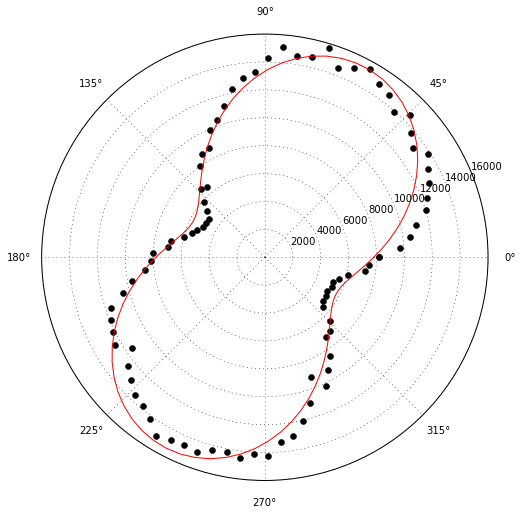

In [2]:
T1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\2-16-17\bare ND on CPW 1mW x22 y74 rotor sweep')
T1[:,1] -= 2180
OrientPol(T1,False)

In [32]:
rcParams.keys()


[u'agg.path.chunksize',
 u'animation.avconv_args',
 u'animation.avconv_path',
 u'animation.bitrate',
 u'animation.codec',
 u'animation.convert_args',
 u'animation.convert_path',
 u'animation.ffmpeg_args',
 u'animation.ffmpeg_path',
 u'animation.frame_format',
 u'animation.html',
 u'animation.mencoder_args',
 u'animation.mencoder_path',
 u'animation.writer',
 u'axes.axisbelow',
 u'axes.edgecolor',
 u'axes.facecolor',
 u'axes.formatter.limits',
 u'axes.formatter.use_locale',
 u'axes.formatter.use_mathtext',
 u'axes.formatter.useoffset',
 u'axes.grid',
 u'axes.grid.axis',
 u'axes.grid.which',
 u'axes.hold',
 u'axes.labelcolor',
 u'axes.labelpad',
 u'axes.labelsize',
 u'axes.labelweight',
 u'axes.linewidth',
 u'axes.prop_cycle',
 u'axes.spines.bottom',
 u'axes.spines.left',
 u'axes.spines.right',
 u'axes.spines.top',
 u'axes.titlesize',
 u'axes.titleweight',
 u'axes.unicode_minus',
 u'axes.xmargin',
 u'axes.ymargin',
 u'axes3d.grid',
 u'backend',
 u'backend.qt4',
 u'backend.qt5',
 u'backen

Phi: 77.862698 +/- 0.443485
Theta: 54.797024 or +/- 0.439245
Phi(naive): 71.798000
Theta(naive): 58.519793


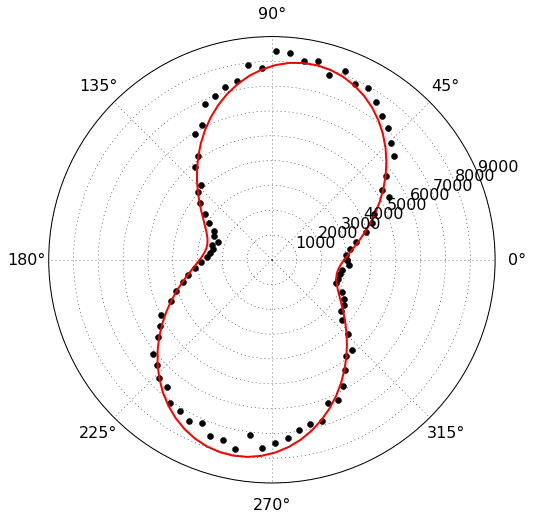

In [39]:
rcParams['font.size']=16
rcParams['ytick.labelsize']=16
rcParams['xtick.labelsize']=16
rcParams['lines.linewidth']=2

T1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\2-16-17\bare ND on CPW 2mW scan 2 x141 y138 rotor sweep')
T1[:,1] -= 1680
OrientPol(T1,False)


C:\Users\Ouyang Group\Anaconda2\lib\site-packages\scipy\optimize\minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[  1.00000000e+02   4.00000000e-03   0.00000000e+00   1.00000000e+01
   1.00000000e+02]


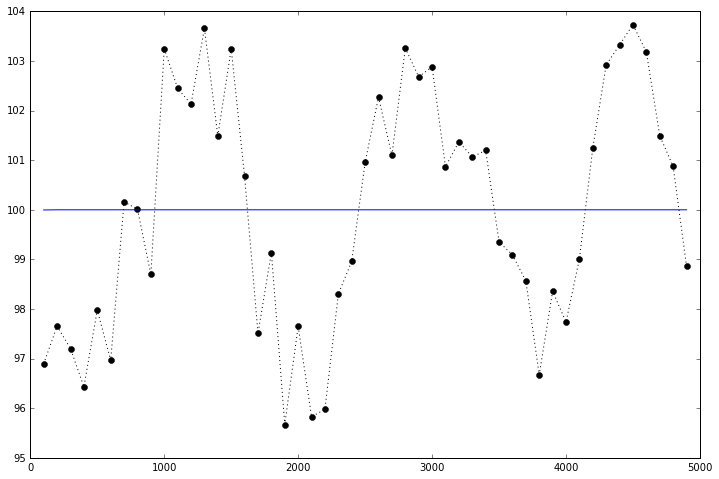

In [7]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\2-16-17\bare ND on CPW 2mW scan 2 x141 y138 t78 th55 d5.1 B0.39V rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\2-16-17\bare ND on CPW 2mW scan 2 x141 y138 t78 th55 d5.1 B0.39V rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(100,4E-3,0,10,100))
t = np.arange(0,np.max(time),1)
plt.plot(time,rabi0,'ko:')
plt.plot(time,RabiFit(time,*opt0),'b-')
print opt0

[  94.68904048  277.10964736   37.94437384]
(40.269679300291557, 0.15758356254863753, 0.25472750963861263)


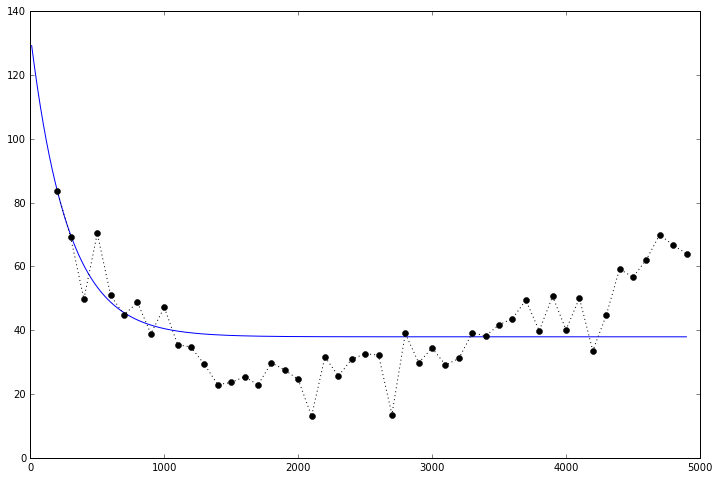

In [8]:
def T2Fit(t,C,tau,D):
    return C*np.exp(-t/tau)+D

time,hahn1 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\2-16-17\bare ND on CPW 2mW scan 2 x141 y138 t78 th55 d5.1 B0.39V hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\2-16-17\bare ND on CPW 2mW scan 2 x141 y138 t78 th55 d5.1 B0.39V hahn Pulse Seq')
hahn1 = hahn1-np.min(hahn1)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(10000,1600,-np.min(hahn1)))
t = np.arange(10,np.max(time),1)
plt.plot(t,T2Fit(t,*opt0),'b-')
plt.plot(time[1:],hahn1[1:],'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))

In [44]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


[  9.48395501e+00   1.10039366e-02  -1.82103152e+00   5.67673949e+02
   1.00273296e+02]


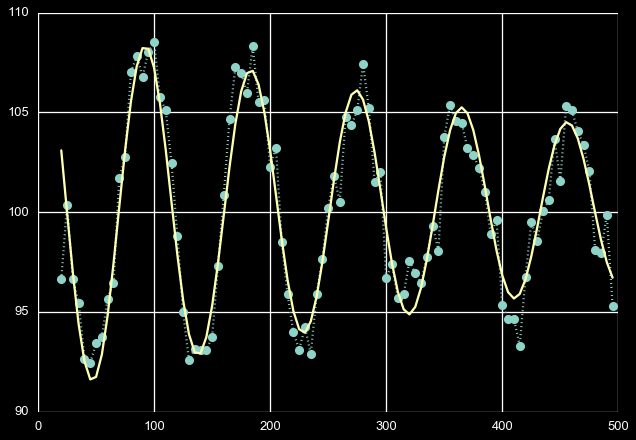

In [51]:
plt.style.use('dark_background')
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\2-16-17\bare ND on CPW 2mW scan 2 x141 y138 t78 th55 d5.1 B0.29V 2 rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\2-16-17\bare ND on CPW 2mW scan 2 x141 y138 t78 th55 d5.1 B0.29V rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(100,4E-3,0,10,100))
t = np.arange(0,np.max(time),1)
plt.plot(time,rabi0,'o:')
plt.plot(time,RabiFit(time,*opt0),'-')
print opt0

[  88.98567939  338.71929553   25.82242492]
(29.231505102040817, 0.18495854968907807, 0.19308650330047281)


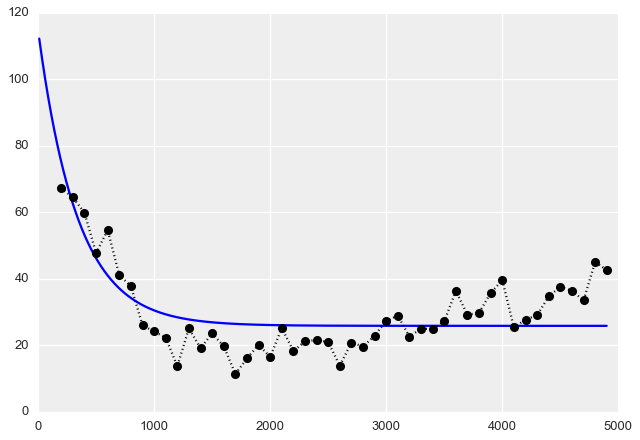

In [47]:
time,hahn1 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\2-16-17\bare ND on CPW 2mW scan 2 x141 y138 t78 th55 d5.1 B0.29V 2 hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\2-16-17\bare ND on CPW 2mW scan 2 x141 y138 t78 th55 d5.1 B0.29V 2 hahn Pulse Seq')
hahn1 = hahn1-np.min(hahn1)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(10000,1600,-np.min(hahn1)))
t = np.arange(10,np.max(time),1)
plt.plot(t,T2Fit(t,*opt0),'b-')
plt.plot(time[1:],hahn1[1:],'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))

Phi: 251.063075 +/- 0.744022
Theta: 45.866946 or +/- 0.583038
Phi(naive): 249.775000
Theta(naive): 50.352303


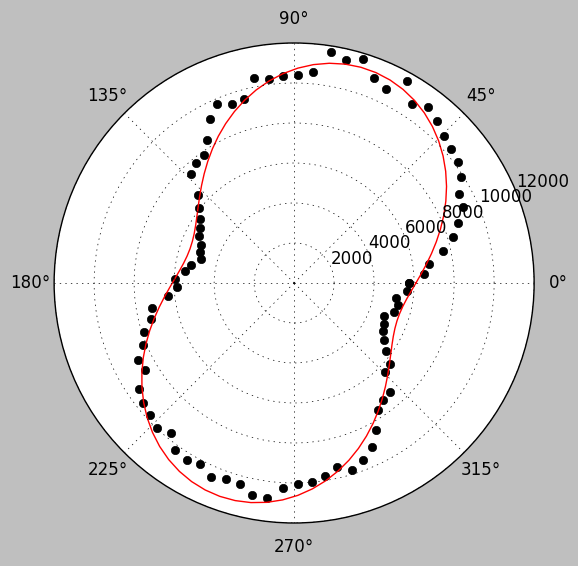

In [58]:
T1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\2-16-17\bare ND on CPW 2mW scan 3 x76 y80 rotor sweep')
T1[:,1] -= 1680
OrientPol(T1,False)

[  9.67224129e+00   1.25427205e-02  -1.53920471e+00   4.11782450e+02
   1.00153977e+02]


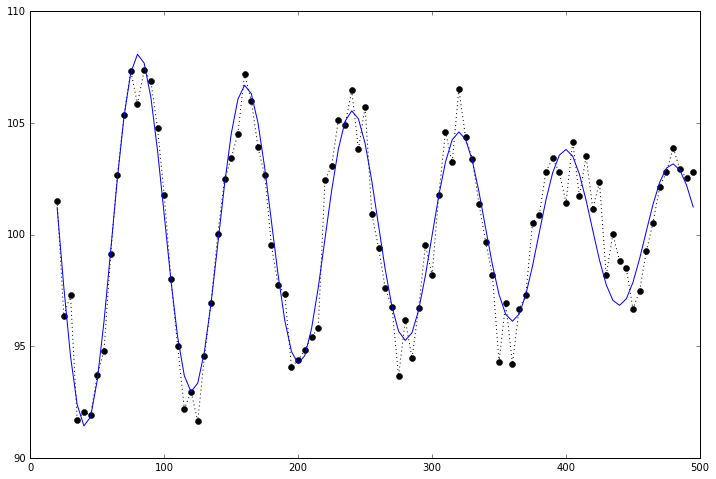

In [6]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\2-16-17\bare ND on CPW 2mW scan 2 x76 y80 t70 th46 d6.5 B0.29V 2 rabi *[1-9]',
              r'C:\Users\Ouyang Group\Documents\Data\2-16-17\bare ND on CPW 2mW scan 2 x76 y80 t70 th46 d6.5 B0.29V 2 rabi Pulse Seq.txt')
rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(10,14E-3,0,10,100))
t = np.arange(0,np.max(time),1)
plt.plot(time,rabi0,'ko:')
plt.plot(time,RabiFit(time,*opt0),'b-')
print opt0

[  95.18016694  339.50237155   16.73078196]
(20.669642857142858, 0.21995483534042354, 0.310775406606282)


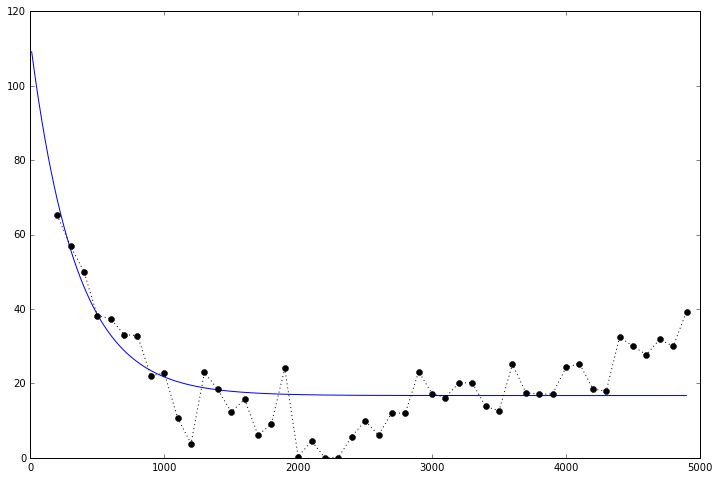

In [12]:
time,hahn1 = EPR(r'C:\Users\Ouyang Group\Documents\Data\2-16-17\bare ND on CPW 2mW scan 2 x76 y80 t70 th46 d6.5 B0.29V 2 hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\2-16-17\bare ND on CPW 2mW scan 2 x76 y80 t70 th46 d6.5 B0.29V 2 hahn Pulse Seq')
hahn1 = hahn1-np.min(hahn1)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(10000,1600,-np.min(hahn1)))
t = np.arange(10,np.max(time),1)
plt.plot(t,T2Fit(t,*opt0),'b-')
plt.plot(time[1:],hahn1[1:],'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))